In [27]:
import pandas as pd
import json
import glob
from datetime import datetime
import matplotlib.pyplot as plt

In [28]:
# Create an empty DataFrame
df = pd.DataFrame(columns=['datetime', 'coverage', 'last_digit'])

In [29]:
# Loop over all JSON files in the current directory
for filename in glob.glob('pred_*.json'):
    # print(filename)
    # Extract the datetime, convert it to a datetime object and format it
    datetime_str = filename.split('_')[1] 
    # print(datetime_str)
    datetime_obj = datetime.strptime(datetime_str, '%Y-%m-%d %H:%M:%S')

    # Extract the last digit before the .json extension
    last_digit = filename.split('_')[-1][0]

    # Open the JSON file and load the data
    with open(filename, 'r') as f:
        data = json.load(f)

    # Extract the 'Coverage[0.9]' value
    coverage = data['Coverage[0.9]']

    # Append the data to the DataFrame
    df = df.append({'datetime': datetime_obj, 'coverage': coverage, 'last_digit': last_digit}, ignore_index=True)

# Print the DataFrame
df = df.sort_values(['datetime', 'last_digit'])

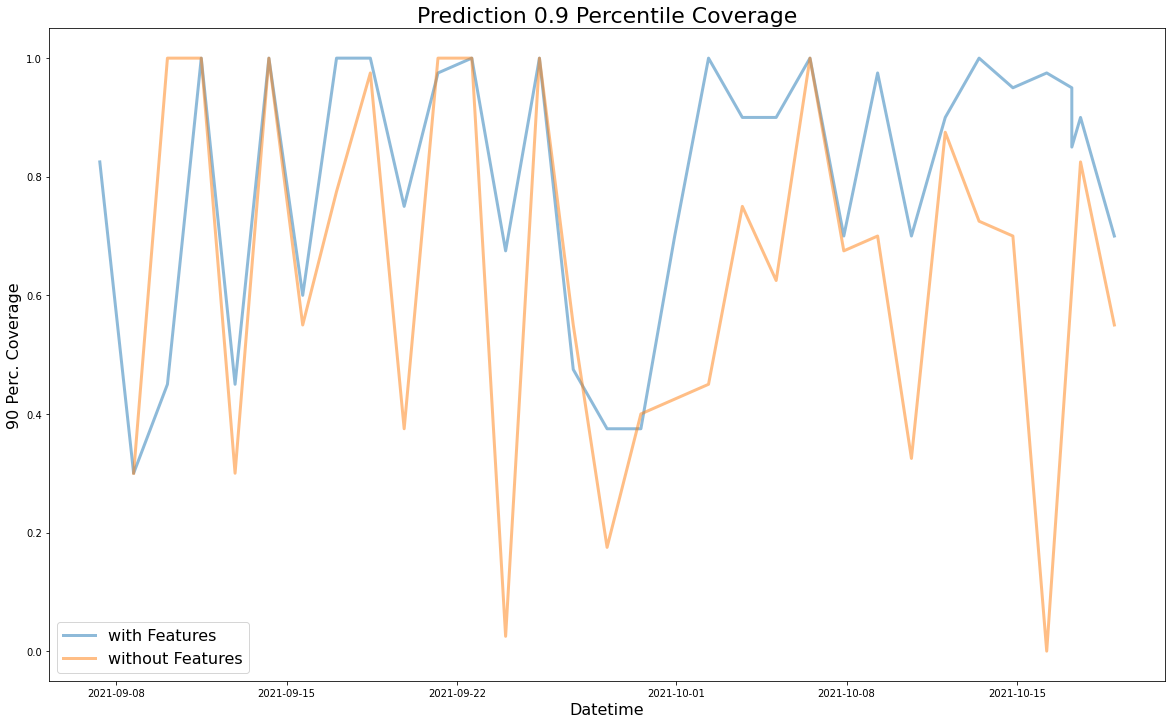

In [40]:
# Filter the DataFrame
df_6 = df[df['last_digit'] == '6']
df_0 = df[df['last_digit'] == '0']

# Create a new figure
plt.figure(figsize=(20, 12))

# Plot the 'coverage' column for last_digit=6
plt.plot(df_6['datetime'], df_6['coverage'], label='with Features', alpha=0.5,  linewidth=3)

# Plot the 'coverage' column for last_digit=0
plt.plot(df_0['datetime'], df_0['coverage'], label='without Features', alpha=0.5,  linewidth=3)

plt.title('Prediction 0.9 Percentile Coverage', fontsize=22)

plt.xlabel('Datetime', fontsize=16)
plt.ylabel('Coverage', fontsize=16)

# Add a legend
plt.legend(fontsize=16)

# Display the plot
plt.show()